## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




### Práctica 7 -Solución

No olvidéis los nombres de los dos componentes del grupo


Nombre 1:

Nombre 2:


<img src="https://grist.org/wp-content/uploads/2020/03/gettyimages-1179212574-e1584114897219.jpg" width=400/>

Vamos a analizar un fichero con datos de [viajes en bicicleta](https://www.kaggle.com/datasets/gabrielramos87/bike-trips) por Nueva York extraído de Kaggle.

**Ejercicio 1**  Leer el fichero desde la URL `url` teniendo en cuenta que las columnas "start_time" y "stop_time" son de tipo *datetime* (ver [aquí](https://stackoverflow.com/questions/21269399/datetime-dtypes-in-pandas-read-csv)). El resultado debe quedar en un dataframe de Pandas con nombre `df_raw`

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

url= "https://github.com/RafaelCaballero/tdm/raw/master/datos/NYbike.zip"

# solución
df_raw = pd.read_csv(url,parse_dates=["start_time", "stop_time"])

# para ver el contenido
df_raw

start_time           stop_time  start_station_id  \
0     2018-05-09 18:43:16 2018-05-09 19:02:25               362   
1     2018-05-23 20:12:08 2018-05-23 20:28:10              3059   
2     2018-05-02 17:47:11 2018-05-02 17:59:53              3664   
3     2018-05-21 08:22:28 2018-05-21 08:39:51              3569   
4     2018-05-31 17:35:25 2018-05-31 18:06:53               474   
...                   ...                 ...               ...   
49995 2018-05-04 08:02:55 2018-05-04 08:07:30              3300   
49996 2018-05-26 13:46:37 2018-05-26 13:59:25               315   
49997 2018-05-31 08:04:40 2018-05-31 08:11:49               537   
49998 2018-05-24 17:31:36 2018-05-24 17:53:50               492   
49999 2018-05-07 17:07:06 2018-05-07 17:09:46              3233   

       end_station_id   user_type  bike_id  gender  age  trip_duration  
0                3467  Subscriber    15063    male   23          19.15  
1                3420  Subscriber    27714  female   33          16.03  
2                3002  Subscriber    21317  female   24          12.68  
3                3381  Subscriber    30276    male   34          17.37  
4                3331  Subscriber    30135  female   31          31.47  
...               ...         ...      ...     ...  ...            ...  
49995            3418  Subscriber    15221  female   51           4.58  
49996            2008  Subscriber    33294    male   58          12.80  
49997             293  Subscriber    32148    male   56           7.13  
49998             317  Subscriber    17055    male   28          22.23  
49999             228  Subscriber    19366    male   38           2.67  

[50000 rows x 9 columns]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   start_time        50000 non-null  datetime64[ns]
 1   stop_time         50000 non-null  datetime64[ns]
 2   start_station_id  50000 non-null  int64         
 3   end_station_id    50000 non-null  int64         
 4   user_type         50000 non-null  object        
 5   bike_id           50000 non-null  int64         
 6   gender            50000 non-null  object        
 7   age               50000 non-null  int64         
 8   trip_duration     50000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 3.4+ MB


In [5]:
df_raw.describe()

start_station_id  end_station_id       bike_id           age  \
count      50000.000000    50000.000000  50000.000000  50000.000000   
mean        1556.719200     1541.566800  26192.324520     37.943300   
std         1429.951866     1427.601063   5789.473116     11.047923   
min           72.000000       72.000000  14529.000000     16.000000   
25%          382.000000      379.000000  20603.000000     29.000000   
50%          503.000000      501.000000  27845.000000     35.000000   
75%         3233.000000     3233.000000  31028.000000     46.000000   
max         3686.000000     3686.000000  33690.000000     65.000000   

       trip_duration  
count   50000.000000  
mean       18.769479  
std       522.013157  
min         1.020000  
25%         6.080000  
50%        10.230000  
75%        17.520000  
max     86384.020000

**Ejercicio 1.b** 2 pasos:
    
1.- Crear un nuevo dataframe `df_hour` como copia de `df_raw`

2.- Añadir una columna `hour`a `df_hour` que tenga la hora de salida (extraída de `start_time`). Ver [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor) información útil  para extraer la hora
    


In [6]:
df_hour = df_raw.copy()
df_hour["hour"] = df_raw.start_time.dt.hour
df_hour

start_time           stop_time  start_station_id  \
0     2018-05-09 18:43:16 2018-05-09 19:02:25               362   
1     2018-05-23 20:12:08 2018-05-23 20:28:10              3059   
2     2018-05-02 17:47:11 2018-05-02 17:59:53              3664   
3     2018-05-21 08:22:28 2018-05-21 08:39:51              3569   
4     2018-05-31 17:35:25 2018-05-31 18:06:53               474   
...                   ...                 ...               ...   
49995 2018-05-04 08:02:55 2018-05-04 08:07:30              3300   
49996 2018-05-26 13:46:37 2018-05-26 13:59:25               315   
49997 2018-05-31 08:04:40 2018-05-31 08:11:49               537   
49998 2018-05-24 17:31:36 2018-05-24 17:53:50               492   
49999 2018-05-07 17:07:06 2018-05-07 17:09:46              3233   

       end_station_id   user_type  bike_id  gender  age  trip_duration  hour  
0                3467  Subscriber    15063    male   23          19.15    18  
1                3420  Subscriber    27714  female   33          16.03    20  
2                3002  Subscriber    21317  female   24          12.68    17  
3                3381  Subscriber    30276    male   34          17.37     8  
4                3331  Subscriber    30135  female   31          31.47    17  
...               ...         ...      ...     ...  ...            ...   ...  
49995            3418  Subscriber    15221  female   51           4.58     8  
49996            2008  Subscriber    33294    male   58          12.80    13  
49997             293  Subscriber    32148    male   56           7.13     8  
49998             317  Subscriber    17055    male   28          22.23    17  
49999             228  Subscriber    19366    male   38           2.67    17  

[50000 rows x 10 columns]

**Ejercicio 2** Hacer histograma de todos las columnas de `df_hour`para las que pueda tener sentido aplicar este tipo de gráfica (ordinales, intervalo y ratio). Se pueden añadir más casillas de código si se considera conveniente para histogramas de más columnas

<Axes: >

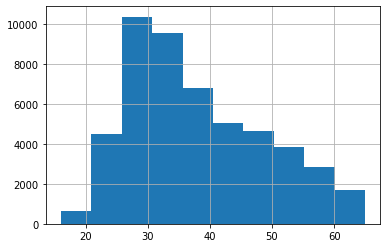

In [8]:
# solución
df_hour["age"].hist()

<Axes: >

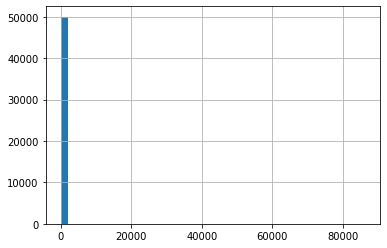

In [9]:
df_hour["trip_duration"].hist(bins=40)

<Axes: >

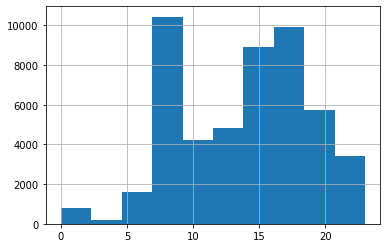

In [10]:
df_hour.hour.hist()

Escribe una frase con la información que veas más relevante sobre cada histograma:

Solución



**Ejercicio 3** A menudo los datasets tienen que cumplir unas ciertas *reglas de validación*. Escribir código para eliminar todas las filas df_hour que no verifiquen la regla 

$R_1$ `stop_time > start_time`

El df resultante se llamara df_R1

In [12]:
# solución
filtro_R1 = df.stop_time > df.start_time
df_R1 = df[filtro_R1]

# para probar
len(df)-len(df_R1)

1

**Ejercicio 4** Otra regla de validación a verificar


$R_2$  stop_time - start_time < 500 minutos

Para aplicar esta regla vamos a proceder como sigue:

* Creamos df_R2 como una copia de df_R1
* Añadimos una columna `tot_mins_diff` a df_R2 que sea la diferencia en minutos entre stop_time y start_time calculada por nosotros. 
* Eliminamos de df_R2 todas las filas que verifiquen `tot_mins_diff`>500


Nota: Dados 2 valores `a` y `b` de tipo  datetime64[ns], podemos calcular su diferencia en minutos como `(a-b)/ pd.Timedelta(minutes=1)`, que dará un valor de tipo float con la diferencia en minutos


In [16]:
df_R1.dtypes

start_time          datetime64[ns]
stop_time           datetime64[ns]
start_station_id             int64
end_station_id               int64
user_type                   object
bike_id                      int64
gender                      object
age                          int64
trip_duration              float64
dtype: object

In [17]:
# solución
df_R2 = df_R1.copy()

df_R2['tot_mins_diff'] = (df_R1.stop_time - df_R1.start_time) / pd.Timedelta(minutes=1)

filtro = df_R2['tot_mins_diff'] <= 500
df_R2 = df_R2[filtro]

# para probar
len(df_R1)-len(df_R2) #  28

28

**Ejercicio 5** El valor `trip_duration` ya contiene la duración del viaje en minutos tal y como la da el dataset, que debe coincidir muy aproximadamente con el valor `tot_mins_diff` que acabamos de calcular.

¿Podemos considerar que las distribuciones de `trip_duration` y `tot_mins_diff` son aproximadamente iguales en `df_R2`? Escribir un fragmento de código que utilice un test y muestre un mensaje con esta información y que también muestre el p-value.

Nota: Utilizar el [Kolmogorov-Smirnov](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) test ya que no se puede asumir que estas variables siguen una distribución normal 

In [37]:
from scipy.stats import kstest


# solución
e,p = kstest(df_R2.trip_duration, df_R2.tot_mins_diff)
print("Las distribuciones son diferentes " if p<0.05 else "No podemos descartar distribuciones iguales", p)

No podemos descartar distribuciones iguales 0.9997598257176995


**Ejercicio 6** Hacer un boxplot de 'age' en df_R2

<AxesSubplot: xlabel='age'>

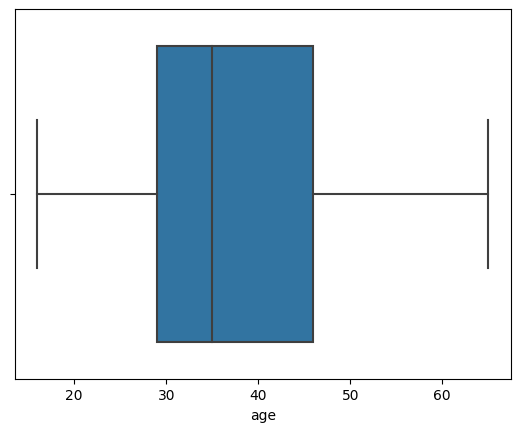

In [92]:
 sns.boxplot(x=df_R2['age'] )

In [ ]:
¿Qué información se extrae viendo el boxplot? (una par de líneas deben bastar)

**Ejercicio 7** Escribir código para mostrar si la variable `age` en df_R2 es asimétrica a la derecha, a la izquierda o si no podemos descartar simetría, y análogamente con la curtosis (si es mesocúrtica, leptocúrtica o si no podemos descartar curtosis==0).

Nota: Los mensajes deben corresponder a hechos con significancia estadística

In [40]:
# solución

from scipy.stats import skew,skewtest,kurtosis,kurtosistest
x = df_R2.age
e_s,p_s  = skewtest(x)
e_k,p_k  = kurtosistest(x)
if p_s>0.05: 
    print("No podemos rechazar que no tenga asimetría")
else:
    print("Asimetría: ", "positiva" if skew(x)>0 else "negativa")
if p_k>0.05: 
    print("No podemos rechazar que curtosis==0")
else:
    print("Curtosis: ", "leptocúrtica" if kurtosis(x)>0 else "mesocúrtica")



Asimetría:  positiva
Curtosis:  mesocúrtica


**Ejercicio 8** Cuando las variables son de tipo nominal en lugar de un histograma podemos hacer un diagrama de barras. La biblioteca seaborn (sns) incluye  la función `countplot`para este fin mostrando el reparto por `user_type`y por `gender`como muestra la figura:

<img src="https://github.com/RafaelCaballero/tdm/raw/master/images/user_type_gender.jpg" width=400 />

<Axes: xlabel='user_type', ylabel='count'>

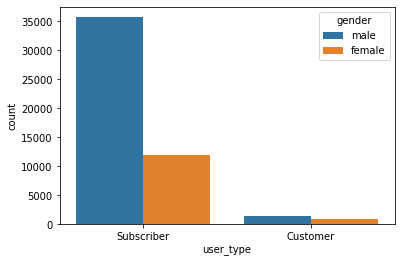

In [41]:
# solución
sns.countplot(data=df_R2, x="user_type", hue="gender")

**Ejercicio 9** Generar un nuevo dataframe `df_sinout` que sea el resultado de quitar outliers de df_R2 para `trip_duration` con el método  *Hampel X84* con $\theta=4$ 

In [ ]:
# solución
from scipy.stats import median_abs_deviation
theta =4 


x = df_R2.trip_duration
mediana = x.median()
MAD = median_abs_deviation(x)
inferior = mediana -  1.4826*theta*MAD
superior = mediana + 1.4826*theta*MAD

df_sinout = df_R2[(df_R2.trip_duration>inferior) & (df_R2.trip_duration<superior) ]

# para probar
sinout

**Ejercicio 10** Tabla con tiempo medio por trayecto (`trip_duration`) de estación a estación en df_R2, será una tabla donde los índices son los valores de 'start_station_id', las  columnas  los valores de 'end_station_id' y el valor que corresponde a una estación de partida y otra de destino es la media de la duración entre ambas estaciones

In [42]:
# solución


start_time           stop_time  start_station_id  \
0     2018-05-09 18:43:16 2018-05-09 19:02:25               362   
1     2018-05-23 20:12:08 2018-05-23 20:28:10              3059   
2     2018-05-02 17:47:11 2018-05-02 17:59:53              3664   
3     2018-05-21 08:22:28 2018-05-21 08:39:51              3569   
4     2018-05-31 17:35:25 2018-05-31 18:06:53               474   
...                   ...                 ...               ...   
49995 2018-05-04 08:02:55 2018-05-04 08:07:30              3300   
49996 2018-05-26 13:46:37 2018-05-26 13:59:25               315   
49997 2018-05-31 08:04:40 2018-05-31 08:11:49               537   
49998 2018-05-24 17:31:36 2018-05-24 17:53:50               492   
49999 2018-05-07 17:07:06 2018-05-07 17:09:46              3233   

       end_station_id   user_type  bike_id  gender  age  trip_duration  \
0                3467  Subscriber    15063    male   23          19.15   
1                3420  Subscriber    27714  female   33          16.03   
2                3002  Subscriber    21317  female   24          12.68   
3                3381  Subscriber    30276    male   34          17.37   
4                3331  Subscriber    30135  female   31          31.47   
...               ...         ...      ...     ...  ...            ...   
49995            3418  Subscriber    15221  female   51           4.58   
49996            2008  Subscriber    33294    male   58          12.80   
49997             293  Subscriber    32148    male   56           7.13   
49998             317  Subscriber    17055    male   28          22.23   
49999             228  Subscriber    19366    male   38           2.67   

       tot_mins_diff  
0          19.150000  
1          16.033333  
2          12.700000  
3          17.383333  
4          31.466667  
...              ...  
49995       4.583333  
49996      12.800000  
49997       7.150000  
49998      22.233333  
49999       2.666667  

[49971 rows x 10 columns]